In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('events filters к тестовому 2022.csv')
df.head()

,event_category,event_action,event_label,total_events,unique_events
0,city_landing,price_button_submit,Tula / Показать предложения (11),8,7
1,city_landing,price_button_submit,Sochi / Показать предложения (39),12,10
2,city_landing,search-tools-button_open,Penza / Сортировка,2,2
3,city_landing,filters-categories_click,Gelendzhik / ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ,1,1
4,city_landing,price_button_submit,Moscow / Показать предложения (345),2,2


In [16]:
df['unique_events'].sum()

1679447

### 1. Сколько людей пользуются фильтрами?

In [4]:
count = 0
for i in df['event_action']:
    if i == 'price_button_submit':
        count += 1

print("Всего вариантов совершенного события:", count)

print("Всего уникальных нажатий на кнопку 'применить фильтры':",
      df.loc[df['event_action'] == 'price_button_submit', 'unique_events'].sum())

Всего вариантов совершенного события: 7354
Всего уникальных нажатий на кнопку 'применить фильтры': 63063


### 2. В каких городах фильтрами пользуются больше? В каких меньше?

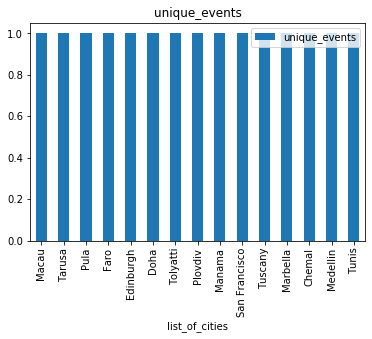

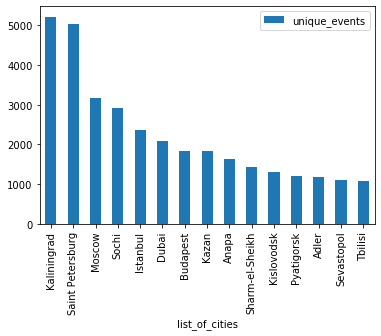

In [5]:
# только те события, где была нажата кнопка "применить фильры"
# ------------
df_filtred = df.loc[df['event_action'] == 'price_button_submit', ['event_label', 'unique_events']]
df_filtred = df_filtred.reset_index()
df_filtred = df_filtred.drop(['index'], axis='columns')
df_filtred
# ------------

# Группировка по городам
list_of_cities = []
for i in df_filtred['event_label']:
    if '/' in i:
        city_name, msg = i.split(" / ")
#         if city_name in list_of_city:
#             continue
        list_of_cities.append(city_name)
    else: 
#         if city_name in list_of_city:
#             continue
        list_of_cities.append(i)
        
df_filtred['list_of_cities'] = list_of_cities

city_sum = df_filtred.groupby('list_of_cities').sum()
city_sum = city_sum.reset_index().sort_values(by=['unique_events'], ascending=False)

city_sum[-15:].plot(kind='bar', x='list_of_cities', y='unique_events', subplots=True)
plt.show()

city_sum[:15].plot(kind='bar', x='list_of_cities', y='unique_events')
plt.show()

### 3. Какие разделы фильтров наиболее востребованы? “Фильтры”, “сортировка”, “категории”?

In [6]:
event_action_group_describe = df.groupby('event_action').describe().copy()
event_action_group_describe

total_events                                        \
                                count         mean           std  min   25%   
event_action                                                                  
Page Visit                      651.0  3264.198157  18105.434004  1.0  12.5   
clear_filter_mobile             165.0    21.812121     48.970821  1.0   2.0   
dates_filter_mobile             425.0    30.677647     93.334012  1.0   1.0   
end_date_click                  274.0    53.423358    144.106174  1.0   2.0   
filters-categories_click       3352.0    23.885740     55.465630  1.0   2.0   
pay-type_checkbox               239.0    30.631799     79.636981  1.0   2.0   
price_button_close              277.0    51.433213    133.108706  1.0   2.0   
price_button_submit            7354.0     9.775632     16.147953  1.0   2.0   
price_first                     186.0    46.086022    105.448351  1.0   3.0   
price_second                    126.0    22.428571     60.210488  1.0   2.0   
price_third                     101.0     8.950495     21.071011  1.0   2.0   
search-tools-button_open       4848.0    19.432756     78.793578  1.0   1.0   
start_date_click                299.0    66.685619    186.133697  1.0   2.0   
ticket-type_checkbox            795.0    28.782390     77.736260  1.0   2.0   

                                                 unique_events               \
                           50%     75%       max         count         mean   
event_action                                                                  
Page Visit                91.0  762.00  350560.0         651.0  2126.694316   
clear_filter_mobile        4.0   21.00     415.0         165.0    16.896970   
dates_filter_mobile        4.0   21.00     978.0         425.0    24.169412   
end_date_click             7.0   39.75    1354.0         274.0    42.839416   
filters-categories_click   5.0   20.00     798.0        3352.0    18.657220   
pay-type_checkbox          5.0   24.00     718.0         239.0    22.866109   
price_button_close         5.0   31.00    1218.0         277.0    42.043321   
price_button_submit        4.0   11.00     297.0        7354.0     8.575333   
price_first               10.0   43.00     764.0         186.0    35.892473   
price_second               5.0   20.25     545.0         126.0    15.833333   
price_third                3.0    7.00     186.0         101.0     5.891089   
search-tools-button_open   2.0    8.00    1967.0        4848.0    17.692450   
start_date_click           7.0   46.50    1824.0         299.0    48.498328   
ticket-type_checkbox       5.0   21.00    1049.0         795.0    22.538365   

                                                                            
                                   std  min    25%   50%     75%       max  
event_action                                                                
Page Visit                11829.695826  1.0  10.00  70.0  550.50  231941.0  
clear_filter_mobile          34.707071  1.0   1.00   4.0   17.00     283.0  
dates_filter_mobile          70.744288  1.0   1.00   3.0   17.00     702.0  
end_date_click              112.081716  1.0   2.00   6.0   30.75    1026.0  
filters-categories_click     42.103903  1.0   1.00   4.0   16.00     493.0  
pay-type_checkbox            54.952069  1.0   1.00   4.0   18.50     455.0  
price_button_close          108.353278  1.0   1.00   4.0   28.00    1021.0  
price_button_submit          13.992357  1.0   2.00   4.0   10.00     242.0  
price_first                  76.110796  1.0   2.00   9.0   36.00     542.0  
price_second                 35.639248  1.0   1.25   4.0   14.75     290.0  
price_third                  11.369170  1.0   1.00   2.0    5.00      94.0  
search-tools-button_open     70.151033  1.0   1.00   2.0    7.00    1615.0  
start_date_click            133.890178  1.0   1.00   6.0   34.00    1273.0  
ticket-type_checkbox         59.781820  1.0   1.00   4.0   16.50     823.0

In [7]:
# 3.1) filters-categories_click - включает сразу два типа мета-фильтров: "сортировку" и "категории".
# 3.2) мета-фильтр - "фильтры" содержатся в: ticket-type_checkbox, start_date_click, end_date_click,
# dates_filter_mobile, pay-type_checkbox, price_first, price_second, price_third.

event_action_group = df.groupby('event_action').sum().copy()
event_action_group = event_action_group.drop(['Page Visit', 'clear_filter_mobile', 'search-tools-button_open',
                                             'price_button_close', 'price_button_submit'], axis=0)
event_action_group = event_action_group.reset_index()
# event_action_group = event_action_group.drop(['total_events'], axis=1)

event_action_group

,event_action,total_events,unique_events
0,dates_filter_mobile,13038,10272
1,end_date_click,14638,11738
2,filters-categories_click,80065,62539
3,pay-type_checkbox,7321,5465
4,price_first,8572,6676
5,price_second,2826,1995
6,price_third,904,595
7,start_date_click,19939,14501
8,ticket-type_checkbox,22882,17918


In [8]:
from abc_analysis import abc_analysis

def the_best_abc_analysis(table, metric):
    abc = abc_analysis(table[metric], True) # показательным параметром у нас будет, соответственно, величина eCPM
    abc

    a_index = abc['Aind']
    b_index = abc['Bind']
    c_index = abc['Cind']

    cond_list = [table.index.isin(a_index),
                 table.index.isin(b_index),
                 table.index.isin(c_index)]

    choose_list = ['A', 'B', 'C']

    table['abc'] = np.select(cond_list, choose_list)
    table.sort_values(by=[metric], ascending=True)
    
    group_A = table.loc[table['abc'] == 'A']
    group_B = table.loc[table['abc'] == 'B']
    group_C = table.loc[table['abc'] == 'C']
    
    return table

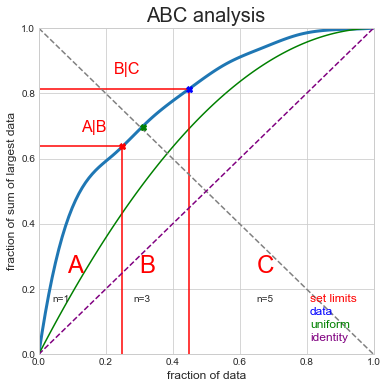

,event_action,total_events,unique_events,abc
0,dates_filter_mobile,13038,10272,C
1,end_date_click,14638,11738,B
2,filters-categories_click,80065,62539,A
3,pay-type_checkbox,7321,5465,C
4,price_first,8572,6676,C
5,price_second,2826,1995,C
6,price_third,904,595,C
7,start_date_click,19939,14501,B
8,ticket-type_checkbox,22882,17918,B


In [9]:
the_best_abc_analysis(event_action_group, 'unique_events')

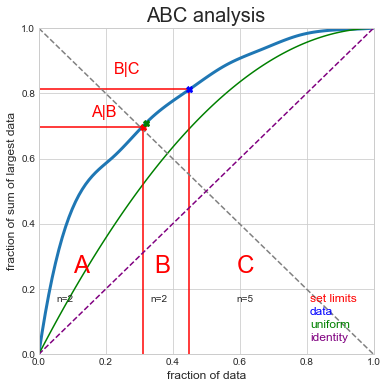

,event_action,total_events,unique_events,abc
0,dates_filter_mobile,13038,10272,C
1,end_date_click,14638,11738,B
2,filters-categories_click,80065,62539,A
3,pay-type_checkbox,7321,5465,C
4,price_first,8572,6676,C
5,price_second,2826,1995,C
6,price_third,904,595,C
7,start_date_click,19939,14501,B
8,ticket-type_checkbox,22882,17918,A


In [10]:
the_best_abc_analysis(event_action_group, 'total_events')

### 4. Как часто люди пользуются выбором цены?

total_events                                                \
                    count       mean         std  min  25%   50%    75%   
event_action                                                              
price_first         186.0  46.086022  105.448351  1.0  3.0  10.0  43.00   
price_second        126.0  22.428571   60.210488  1.0  2.0   5.0  20.25   
price_third         101.0   8.950495   21.071011  1.0  2.0   3.0   7.00   

                    unique_events                                        \
                max         count       mean        std  min   25%  50%   
event_action                                                              
price_first   764.0         186.0  35.892473  76.110796  1.0  2.00  9.0   
price_second  545.0         126.0  15.833333  35.639248  1.0  1.25  4.0   
price_third   186.0         101.0   5.891089  11.369170  1.0  1.00  2.0   

                            
                75%    max  
event_action                
price_first   36.00  542.0  
price_second  14.75  290.0  
price_third    5.00   94.0

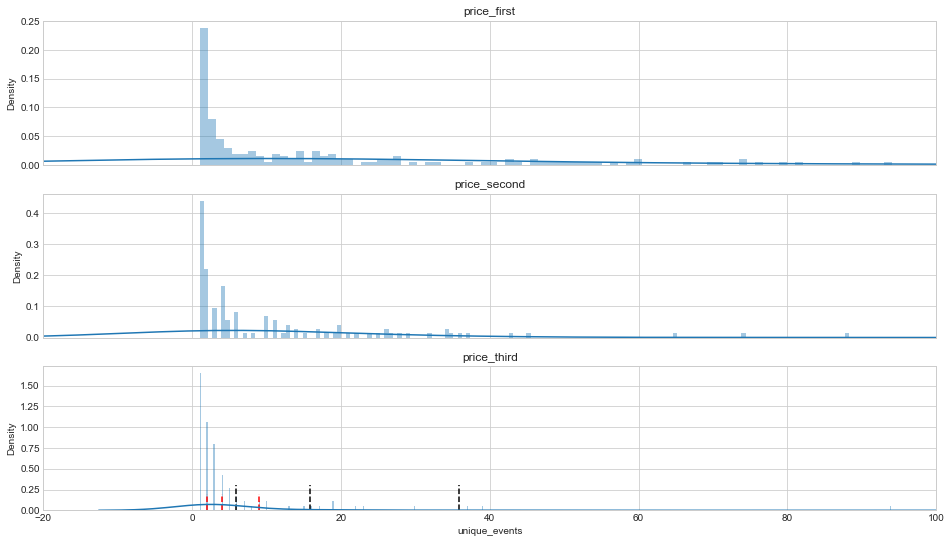

In [11]:
# Для метрики уникальных нажатий

price_choose = pd.DataFrame()

price_choose_first = df.loc[df['event_action'].str.contains('price_first')]
price_choose_second = df.loc[df['event_action'].str.contains('price_second')]
price_choose_third = df.loc[df['event_action'].str.contains('price_third')]
price_choose = price_choose.append([price_choose_first, price_choose_second, price_choose_third])

price_choose_describe = price_choose.groupby('event_action').describe()

f, axes = plt.subplots(ncols=1, nrows=3, figsize=(16, 9), sharex=True)

for i, ax in zip(list(price_choose['event_action'].unique()), axes.flat):
    ax.set_xlim(-20, 100)
    sns.distplot(price_choose.loc[price_choose['event_action'] == i, 'unique_events'], bins=500, ax=ax)
    ax.set_title(i)
    plt.vlines(np.mean(price_choose.loc[price_choose['event_action'] == i, 'unique_events']), linestyles='dashed', ymin=0, ymax=0.3, 
               label=f'Среднее - {i}')
    plt.vlines(np.median(price_choose.loc[price_choose['event_action'] == i, 'unique_events']), linestyles='dashed', ymin=0, ymax=0.2, 
               label=f'Медиана - {i}', color='r')

price_choose_describe
# price_choose_describe['unique_events']['mean']

total_events                                                \
                    count       mean         std  min  25%   50%    75%   
event_action                                                              
price_first         186.0  46.086022  105.448351  1.0  3.0  10.0  43.00   
price_second        126.0  22.428571   60.210488  1.0  2.0   5.0  20.25   
price_third         101.0   8.950495   21.071011  1.0  2.0   3.0   7.00   

                    unique_events                                        \
                max         count       mean        std  min   25%  50%   
event_action                                                              
price_first   764.0         186.0  35.892473  76.110796  1.0  2.00  9.0   
price_second  545.0         126.0  15.833333  35.639248  1.0  1.25  4.0   
price_third   186.0         101.0   5.891089  11.369170  1.0  1.00  2.0   

                            
                75%    max  
event_action                
price_first   36.00  542.0  
price_second  14.75  290.0  
price_third    5.00   94.0

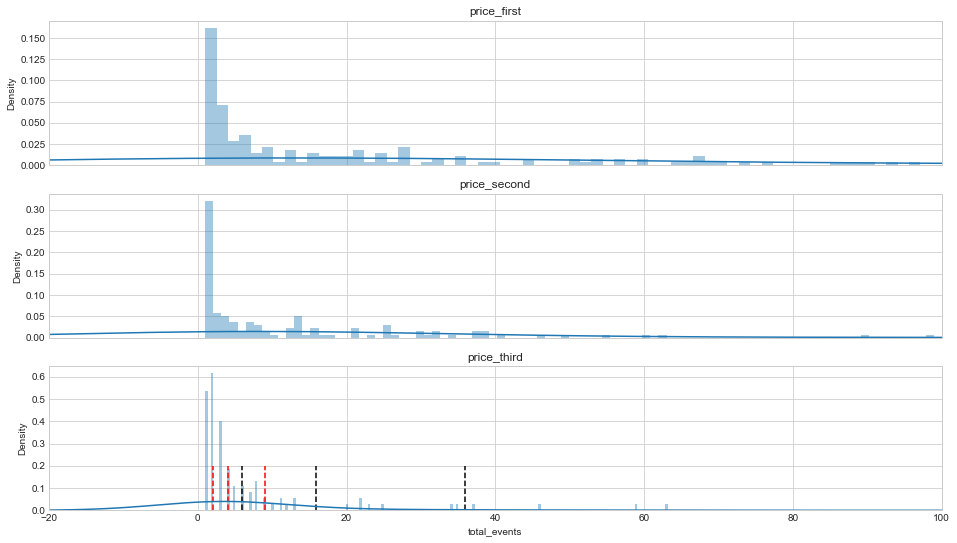

In [12]:
# Для метрики всех нажатий

price_choose = pd.DataFrame()

price_choose_first = df.loc[df['event_action'].str.contains('price_first')]
price_choose_second = df.loc[df['event_action'].str.contains('price_second')]
price_choose_third = df.loc[df['event_action'].str.contains('price_third')]
price_choose = price_choose.append([price_choose_first, price_choose_second, price_choose_third])

price_choose_describe = price_choose.groupby('event_action').describe()

f, axes = plt.subplots(ncols=1, nrows=3, figsize=(16, 9), sharex=True)

for i, ax in zip(list(price_choose['event_action'].unique()), axes.flat):
    ax.set_xlim(-20, 100)
    sns.distplot(price_choose.loc[price_choose['event_action'] == i, 'total_events'], bins=500, ax=ax)
    ax.set_title(i)
    plt.vlines(np.mean(price_choose.loc[price_choose['event_action'] == i, 'unique_events']), linestyles='dashed', ymin=0, ymax=0.2, 
               label=f'Среднее - {i}')
    plt.vlines(np.median(price_choose.loc[price_choose['event_action'] == i, 'unique_events']), linestyles='dashed', ymin=0, ymax=0.2, 
               label=f'Медиана - {i}', color='r')

price_choose_describe
# price_choose_describe['unique_events']['mean']

### 5. Как часто люди фильтруют по ценам? По датам?

total_events                                               \
                           count       mean         std  min  25%  50%    75%   
event_action                                                                    
dates_filter_mobile        425.0  30.677647   93.334012  1.0  1.0  4.0  21.00   
end_date_click             274.0  53.423358  144.106174  1.0  2.0  7.0  39.75   
start_date_click           299.0  66.685619  186.133697  1.0  2.0  7.0  46.50   

                            unique_events                                   \
                        max         count       mean         std  min  25%   
event_action                                                                 
dates_filter_mobile   978.0         425.0  24.169412   70.744288  1.0  1.0   
end_date_click       1354.0         274.0  42.839416  112.081716  1.0  2.0   
start_date_click     1824.0         299.0  48.498328  133.890178  1.0  1.0   

                                         
                     50%    75%     max  
event_action                             
dates_filter_mobile  3.0  17.00   702.0  
end_date_click       6.0  30.75  1026.0  
start_date_click     6.0  34.00  1273.0

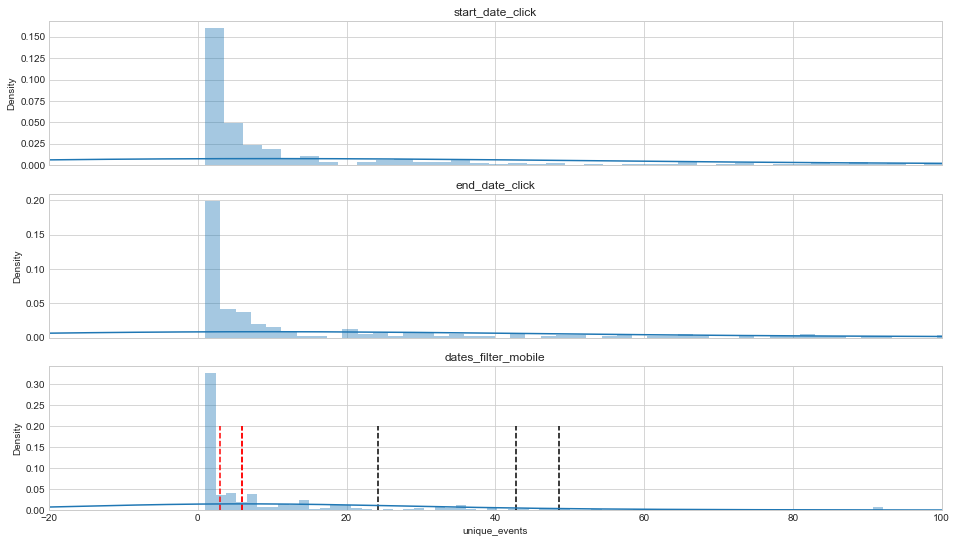

In [15]:
date_choose = pd.DataFrame()

date_choose_first = df.loc[df['event_action'].str.contains('start_date_click')]
date_choose_second = df.loc[df['event_action'].str.contains('end_date_click')]
date_choose_third = df.loc[df['event_action'].str.contains('dates_filter_mobile')]
date_choose = date_choose.append([date_choose_first, date_choose_second, date_choose_third])

date_choose_describe = date_choose.groupby('event_action').describe()

f, axes = plt.subplots(ncols=1, nrows=3, figsize=(16, 9), sharex=True)

for i, ax in zip(list(date_choose['event_action'].unique()), axes.flat):
    ax.set_xlim(-20, 100)
    sns.distplot(date_choose.loc[date_choose['event_action'] == i, 'unique_events'], bins=500, ax=ax)
    ax.set_title(i)
    plt.vlines(np.mean(date_choose.loc[date_choose['event_action'] == i, 'unique_events']), linestyles='dashed', ymin=0, ymax=0.2, 
               label=f'Среднее - {i}')
    plt.vlines(np.median(date_choose.loc[date_choose['event_action'] == i, 'unique_events']), linestyles='dashed', ymin=0, ymax=0.2, 
               label=f'Медиана - {i}', color='r')

date_choose_describe
# price_choose_describe['unique_events']['mean']

### 6. Какие фильтры лишние, невостребованные?

In [ ]:
# см. п. 3